<a href="https://colab.research.google.com/github/koushik2299/Data-Science/blob/main/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Extraction

In [5]:

#Pointing out the location
!cp /content/kaggle.json ~/.kaggle/

#Permissions
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d gargmanas/pima-indians-diabetes

  0% 0.00/8.79k [00:00<?, ?B/s]
100% 8.79k/8.79k [00:00<00:00, 3.59MB/s]


In [7]:
import zipfile
from google.colab import files
with zipfile.ZipFile('/content/pima-indians-diabetes.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [8]:
df=pd.read_csv("/content/pima-indians-diabetes.csv",names=['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Null Values

In [15]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

We need to Upscale the 1's lets do it with the help of SMOTE Upscaling Technique

In [17]:
from imblearn.over_sampling import SMOTE

In [21]:
oversample = SMOTE()

X,Y = oversample.fit_resample(df.drop("Outcome",axis=1),df["Outcome"])

In [22]:
Y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [23]:
X_train, X_Test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=23)

# Without Bagging Using Decision Trees as Model and checking the accuracies


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
#Create Object from Decision Tree Classifier
D_T_C_Model =DecisionTreeClassifier(criterion='entropy' ,random_state=10)

D_T_C_Model.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [29]:
print("Train Accuracy: ",D_T_C_Model.score(X_train , Y_train))
print("Test Accuracy: ",D_T_C_Model.score(X_Test , Y_test))

Train Accuracy:  1.0
Test Accuracy:  0.71


Cross Validation Score

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(D_T_C_Model,X,Y,cv=5)
print(scores)
print(scores.mean())

[0.695 0.685 0.73  0.755 0.755]
0.724


Visualizing the graph

[]

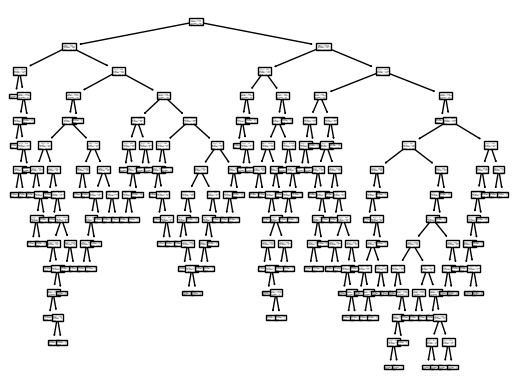

In [31]:
#visualize the tree using tree.plot_tree
from sklearn import tree
tree.plot_tree(D_T_C_Model)
plt.plot()

# Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(criterion='entropy' ,random_state=10),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=23
)

bag_model.fit(X_train,Y_train)
print("Accuracy after Bagging: ",bag_model.oob_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy after Bagging:  0.80125


In [43]:
scores = cross_val_score(bag_model, X, Y, cv=5)
print(scores)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.775 0.73  0.79  0.885 0.82 ]


In [44]:
scores.mean()

0.7999999999999999

So we can see after Bagging the score has boosted from 72 to 79

Random Forest is a Bagging Technique so lets see what accuracy we can acheive with that technique 

In [45]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, Y, cv=5)
scores.mean()

0.8150000000000001